# Temporal Planning with LBBD

In [1]:
import pandas as pd
import json
import matplotlib.pyplot as plt

from os.path import (abspath, basename, dirname, isfile)

#### Configure paths

In [2]:
props_file = abspath("./results/results-eval/properties")

# Checks
if not isfile(props_file):
    raise ValueError("Incorrect property file path")

#### Process json

In [3]:
#Load Data
with open(props_file, 'r') as pf:
    raw_data = json.load(pf)

# Create DataFrame
df = pd.DataFrame(raw_data)
planners = list(set(pd.DataFrame(df.loc['id'].to_list()).loc[:,0]))

# Create a MultiIndex for df on "Planner", "Benchmarks Name","Domain", "Instance"
df.columns = pd.MultiIndex.from_tuples(df.loc['id'].to_list())
df=df.transpose()
display(df)

algorithm benchmark_name  \
cpt   IPC-2018 airport            instance-10       cpt       IPC-2018   
                                  instance-13       cpt       IPC-2018   
                                  instance-14       cpt       IPC-2018   
                                  instance-19       cpt       IPC-2018   
                                  instance-2        cpt       IPC-2018   
...                                                 ...            ...   
popf2 IPC-2018 trucks-time-strips instance-2      popf2       IPC-2018   
                                  instance-5      popf2       IPC-2018   
                                  instance-6      popf2       IPC-2018   
                                  instance-8      popf2       IPC-2018   
                                  instance-9      popf2       IPC-2018   

                                              booleans branches conflicts  \
cpt   IPC-2018 airport            instance-10      124      282         0   
                                  instance-13     2147    24159        72   
                                  instance-14     5194   152880       242   
                                  instance-19     9506   587725       973   
                                  instance-2       238      497         0   
...                                                ...      ...       ...   
popf2 IPC-2018 trucks-time-strips instance-2      None     None      None   
                                  instance-5      None     None      None   
                                  instance-6      None     None      None   
                                  instance-8      None     None      None   
                                  instance-9      None     None      None   

                                              coverage              domain  \
cpt   IPC-2018 airport            instance-10        1             airport   
                                  instance-13        1             airport   
                                  instance-14        1             airport   
                                  instance-19        1             airport   
                                  instance-2         1             airport   
...                                                ...                 ...   
popf2 IPC-2018 trucks-time-strips instance-2         0  trucks-time-strips   
                                  instance-5         0  trucks-time-strips   
                                  instance-6         0  trucks-time-strips   
                                  instance-8         0  trucks-time-strips   
                                  instance-9         0  trucks-time-strips   

                                                                                              id  \
cpt   IPC-2018 airport            instance-10              [cpt, IPC-2018, airport, instance-10]   
                                  instance-13              [cpt, IPC-2018, airport, instance-13]   
                                  instance-14              [cpt, IPC-2018, airport, instance-14]   
                                  instance-19              [cpt, IPC-2018, airport, instance-19]   
                                  instance-2                [cpt, IPC-2018, airport, instance-2]   
...                                                                                          ...   
popf2 IPC-2018 trucks-time-strips instance-2   [popf2, IPC-2018, trucks-time-strips, instance-2]   
                                  instance-5   [popf2, IPC-2018, trucks-time-strips, instance-5]   
                                  instance-6   [popf2, IPC-2018, trucks-time-strips, instance-6]   
                                  instance-8   [popf2, IPC-2018, trucks-time-strips, instance-8]   
                                  instance-9   [popf2, IPC-2018, trucks-time-strips, instance-9]   

                                              integer_propagations  \
cpt   IPC-2018 airport  

#### Info on planners, their property headers and some common operations

In [4]:
print("Columns(Properties): ", df.columns.to_list(),"\n")
print("Rows(MultiIndex - {Planner, Problem}): ", df.index.to_list()[:10],"\n")
print("Planners =", planners)

Columns(Properties):  ['algorithm', 'benchmark_name', 'booleans', 'branches', 'conflicts', 'coverage', 'domain', 'id', 'integer_propagations', 'is_plan_found', 'is_plan_optimal', 'is_plan_valid', 'makespan', 'memory', 'memory_limit', 'plan', 'plan_file', 'problem', 'propagations', 'run_dir', 'runtime_solver', 'runtime_total', 'solver_exit_code', 'time_limit', 'unexplained_errors', 'validate_exit_code'] 

Rows(MultiIndex - {Planner, Problem}):  [('cpt', 'IPC-2018', 'airport', 'instance-10'), ('cpt', 'IPC-2018', 'airport', 'instance-13'), ('cpt', 'IPC-2018', 'airport', 'instance-14'), ('cpt', 'IPC-2018', 'airport', 'instance-19'), ('cpt', 'IPC-2018', 'airport', 'instance-2'), ('cpt', 'IPC-2018', 'airport', 'instance-23'), ('cpt', 'IPC-2018', 'airport', 'instance-27'), ('cpt', 'IPC-2018', 'airport', 'instance-4'), ('cpt', 'IPC-2018', 'airport', 'instance-7'), ('cpt', 'IPC-2018', 'airport', 'instance-9')] 

Planners = ['popf2', 'plan.py she --no-validate', 'optic', 'cpt']


# Data processing and analysis

## Tables

#### Coverage

In [5]:
df.loc[:][['algorithm','coverage']].groupby(['algorithm']).sum()

,coverage
algorithm,
cpt,10
optic,11
plan.py she --no-validate,44
popf2,0


## Plots

#### Coverage over time

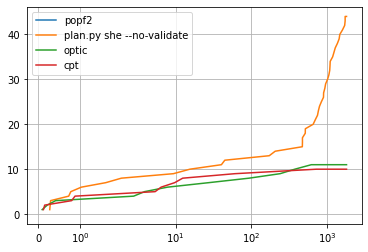

In [6]:
TIME_LIMIT = 1800.0
time_points = dict()
coverage_ov_time = dict()
for p in planners :
    time_points[p]= df.loc[p]['runtime_total'][df.loc[p]['coverage']>0].sort_values().to_list()
    coverage_ov_time[p] = list()
    step = 0
    for t in time_points[p]:
        step = step+1
        coverage_ov_time[p].append(step)
    time_points[p].append(TIME_LIMIT)
    coverage_ov_time[p].append(step)
    
for p in planners:
    plt.plot(time_points[p], coverage_ov_time[p], )
    plt.xscale('symlog')
    plt.grid(True)
plt.legend(planners)
plt.show()

####  Instance wise property comparison

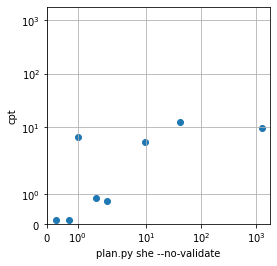

In [16]:
## Configuration
p1 = planners[1]
p2 = planners[3]
prop = 'runtime_total'

## Retrieve data

s1 = pd.to_numeric(df.loc[[p1]][prop]*df.loc[[p1]]['coverage']).to_list()
s2 = pd.to_numeric(df.loc[[p2]][prop]*df.loc[[p2]]['coverage']).to_list()

data  = {p1:s1, p2:s2}

df_plot = pd.DataFrame(data)
df_plot = df_plot[df_plot>0].dropna()

x = df_plot[p1].to_list()
y = df_plot[p2].to_list()

## Plot
f = plt.figure()
f.set_figwidth(4)
f.set_figheight(4)
plt.xlabel(p1)
plt.ylabel(p2)
plt.xscale('symlog')
plt.yscale('symlog')
plt.xlim(0, 1800)
plt.ylim(0, 1800)
plt.grid(True)
plt.scatter(x,y)

## Search Outcomes
#### OOM and OOT Counts

In [18]:
# Exit Codes

"""
Fast Downward exit codes and their meaning. They are documented at
http://www.fast-downward.org/ExitCodes.
"""

import collections
import signal


def get_exit_code(signal_value):
    return 256 - signal_value


Outcome = collections.namedtuple("Outcome", ["value", "msg", "explained", "min_wins"])

LEGACY_OUTCOMES = [
    Outcome(0, "success", explained=True, min_wins=False),
    Outcome(1, "critical-error", explained=False, min_wins=True),
    Outcome(2, "input-error", explained=False, min_wins=True),
    Outcome(3, "unsupported-feature-requested", explained=False, min_wins=True),
    Outcome(4, "unsolvable", explained=True, min_wins=False),
    Outcome(5, "incomplete-search-found-no-plan", explained=True, min_wins=None),
    Outcome(6, "out-of-memory", explained=True, min_wins=True),
    Outcome(7, "timeout", explained=True, min_wins=True),
    Outcome(8, "timeout-and-out-of-memory", explained=True, min_wins=True),
    Outcome(get_exit_code(signal.SIGKILL), "sigkill", explained=False, min_wins=True),
    Outcome(get_exit_code(signal.SIGSEGV), "segfault", explained=False, min_wins=True),
    Outcome(get_exit_code(signal.SIGXCPU), "timeout", explained=True, min_wins=True),
]

EXITCODE_TO_LEGACY_OUTCOME = {outcome.value: outcome for outcome in LEGACY_OUTCOMES}

NEW_OUTCOMES = [
    Outcome(0, "success", explained=True, min_wins=False),
    Outcome(1, "search-plan-found-and-out-of-memory", explained=True, min_wins=None),
    Outcome(2, "search-plan-found-and-out-of-time", explained=True, min_wins=None),
    Outcome(
        3, "search-plan-found-and-out-of-memory-and-time", explained=True, min_wins=None
    ),
    Outcome(10, "translate-unsolvable", explained=True, min_wins=False),
    Outcome(11, "search-unsolvable", explained=True, min_wins=False),
    Outcome(12, "search-unsolvable-incomplete", explained=True, min_wins=None),
    Outcome(20, "translate-out-of-memory", explained=True, min_wins=True),
    Outcome(21, "translate-out-of-time", explained=True, min_wins=True),
    Outcome(22, "search-out-of-memory", explained=True, min_wins=True),
    Outcome(23, "search-out-of-time", explained=True, min_wins=True),
    Outcome(24, "search-out-of-memory-and-time", explained=True, min_wins=True),
    Outcome(30, "translate-critical-error", explained=False, min_wins=True),
    Outcome(31, "translate-input-error", explained=False, min_wins=True),
    Outcome(32, "search-critical-error", explained=False, min_wins=True),
    Outcome(33, "search-input-error", explained=False, min_wins=True),
    Outcome(34, "search-unsupported", explained=False, min_wins=True),
    Outcome(35, "driver-critital-error", explained=False, min_wins=True),
    Outcome(36, "driver-input-error", explained=False, min_wins=True),
    Outcome(37, "driver-unsupported", explained=False, min_wins=True),
    Outcome(get_exit_code(signal.SIGKILL), "sigkill", explained=False, min_wins=True),
    Outcome(get_exit_code(signal.SIGSEGV), "segfault", explained=False, min_wins=True),
]

EXITCODE_TO_OUTCOME = {outcome.value: outcome for outcome in NEW_OUTCOMES}

OUTCOMES = LEGACY_OUTCOMES + NEW_OUTCOMES


def get_outcome(exitcode, use_legacy_exit_codes):
    if use_legacy_exit_codes and exitcode in EXITCODE_TO_LEGACY_OUTCOME:
        return EXITCODE_TO_LEGACY_OUTCOME[exitcode]
    elif not use_legacy_exit_codes and exitcode in EXITCODE_TO_OUTCOME:
        return EXITCODE_TO_OUTCOME[exitcode]
    else:
        msg = f"exitcode-{exitcode}"
        return Outcome(exitcode, msg, explained=False, min_wins=True)